This notebook accompanies my blog post on Positional Analog Scanning, which was inspired by Pennington, L.D., Aquila, B.M., Choi, Y., Valiulin, R.A. and Muegge, I., "Positional Analogue Scanning: An Effective Strategy for Multiparameter Optimization in Drug Design", [Journal of Medicinal Chemistry (2020)](https://pubs.acs.org/doi/abs/10.1021/acs.jmedchem.9b02092). 

In [350]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import rdDepictor
from itertools import combinations

A setting to make the chemical structures look better. 

In [351]:
rdDepictor.SetPreferCoordGen(True)

Define the starting molecule

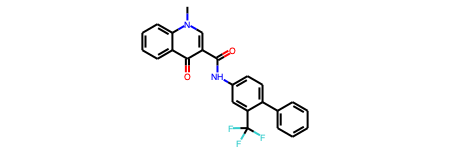

In [352]:
smiles = "CN1C=C(C(=O)Nc2ccc(-c3ccccc3)c(c2)C(F)(F)F)C(=O)c2ccccc12"
mol = Chem.MolFromSmiles(smiles)
mol

Define a template molecule to align the analogs 

In [353]:
tmplt_molfile = """
  Mrv2006 04272015282D          

 30 33  0  0  0  0            999 V2000
   -1.2244   -2.8420    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8627   -2.1005    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3241   -1.4165    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1471   -1.4741    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5087   -2.2156    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0474   -2.8996    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0397   -2.0429    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    1.1015   -1.1830    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.2827   -1.2835    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.4568   -2.7018    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    1.2756   -2.6013    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    1.5980   -1.8418    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    2.4159   -1.7342    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    2.7316   -0.9719    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.5495   -0.8643    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    2.2294   -0.3175    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.1506   -0.4651    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.5775    0.1284    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.7770   -0.0713    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.1227   -1.4577    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.9232   -1.2581    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.8953   -2.2508    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.9475   -0.2516    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.5204   -1.8454    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    6.3173   -1.6318    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    6.5308   -0.8349    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.0797   -3.3175    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5819   -3.9720    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7172   -3.5310    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2360   -4.0797    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
 23 26  8  0  0  0  0
 25 26  8  0  0  0  0
 24 25  8  0  0  0  0
 21 24  8  0  0  0  0
 23 17  8  0  0  0  0
 20 22  8  0  0  0  0
 17 21  8  0  0  0  0
 20 21  8  0  0  0  0
 15 20  8  0  0  0  0
 19 15  8  0  0  0  0
 18 19  8  0  0  0  0
 17 18  8  0  0  0  0
 14 16  8  0  0  0  0
 14 15  8  0  0  0  0
 13 14  8  0  0  0  0
 12 13  8  0  0  0  0
  8 12  8  0  0  0  0
 11 12  8  0  0  0  0
 10 11  8  0  0  0  0
  7 10  8  0  0  0  0
  9  7  8  0  0  0  0
  8  9  8  0  0  0  0
  2  7  8  0  0  0  0
  1  6  8  0  0  0  0
  5  6  8  0  0  0  0
  4  5  8  0  0  0  0
  3  4  8  0  0  0  0
  2  3  8  0  0  0  0
  1  2  8  0  0  0  0
 27 29  1  0  0  0  0
 27 30  1  0  0  0  0
 27 28  1  0  0  0  0
 27 10  1  0  0  0  0
M  END
"""

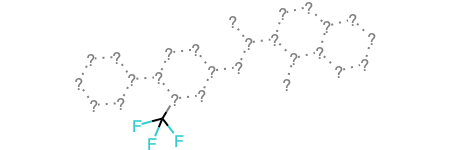

In [354]:
tmplt_mol = Chem.MolFromMolBlock(tmplt_molfile)
tmplt_mol

Check the template to make sure it works

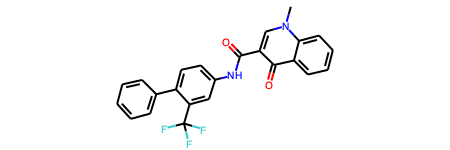

In [355]:
AllChem.GenerateDepictionMatching2DStructure(mol,tmplt_mol)
mol

Define a function to replace aromatic carbon atoms with nitrogen. 

In [356]:
def nitrogen_walk(mol_in, num_N=1):
    out_mol_list = []
    used = set()
    aromatic_cH = Chem.MolFromSmarts("[cH]")
    match_atms = [x[0] for x in mol.GetSubstructMatches(aromatic_cH)]
    n_combos = combinations(match_atms, num_N)
    for combo in n_combos:
        new_mol = Chem.RWMol(mol)
        for idx in combo:
            atm = new_mol.GetAtomWithIdx(idx)
            atm.SetAtomicNum(7)
        smi = Chem.MolToSmiles(new_mol)
        if smi not in used:
            used.add(smi)
            out_mol_list.append(new_mol)
    return out_mol_list

Generate a set of positional analogues where each aronmatic carbon is replaced by nitrogen

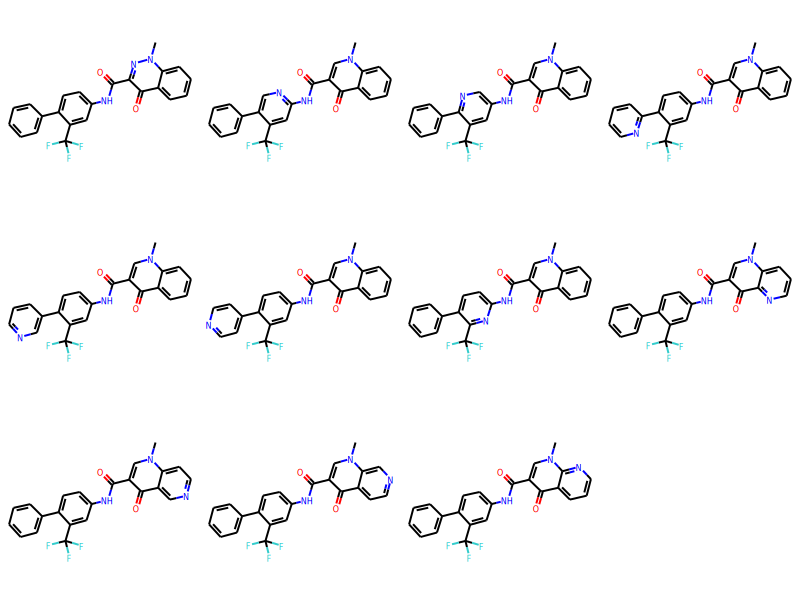

In [368]:
n_mol_list = nitrogen_walk(mol,1)
[AllChem.GenerateDepictionMatching2DStructure(x,tmplt_mol) for x in n_mol_list]
MolsToGridImage(n_mol_list,useSVG=True,molsPerRow=4)

Define a function to "walk" an atom (typically F or methyl) around a molecule

In [369]:
def attach_atom(mol, atomic_symbol="F", smarts="[cH]", num_sub=1):
    pt = Chem.GetPeriodicTable()
    atomic_num = pt.GetAtomicNumber(atomic_symbol)
    out_mol_list = []
    used = set()
    query = Chem.MolFromSmarts(smarts)
    match_atms = [x[0] for x in mol.GetSubstructMatches(aromatic_cH)]
    n_combos = combinations(match_atms, num_sub)
    for combo in n_combos:
        new_mol = Chem.RWMol(mol)
        for idx in combo:
            new_idx = new_mol.AddAtom(Chem.Atom(atomic_num))
            new_mol.AddBond(idx, new_idx, order=Chem.rdchem.BondType.SINGLE)
        Chem.SanitizeMol(new_mol)
        smi = Chem.MolToSmiles(new_mol)
        if smi not in used:
            used.add(smi)
            out_mol_list.append(new_mol)
    return out_mol_list

Generate a set of positional analogues where each aromatic "cH" is replaced by fluorine

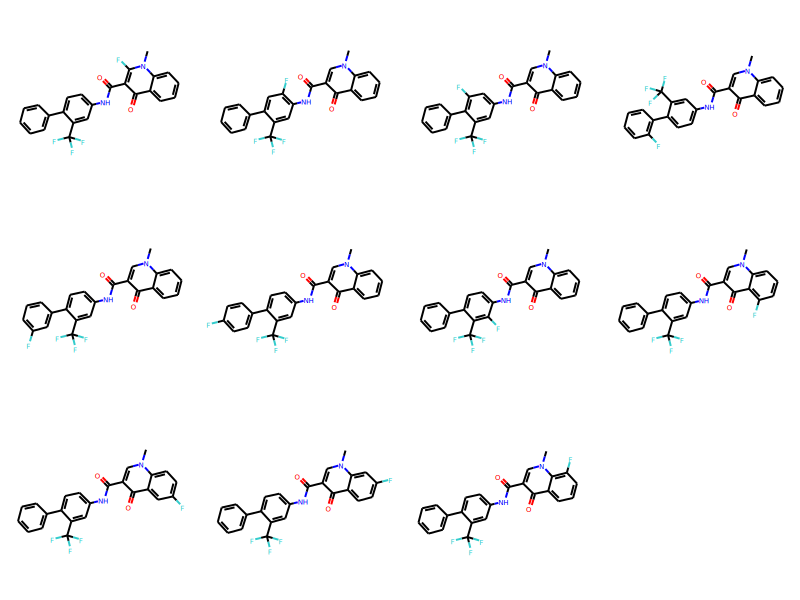

In [370]:
fluoro_mol_list = attach_atom(mol)
[AllChem.GenerateDepictionMatching2DStructure(x,tmplt_mol) for x in fluoro_mol_list]
MolsToGridImage(fluoro_mol_list,useSVG=True,molsPerRow=4)

Generate a set of positional analogues where all pairs of aromatic "cH" are replaced by methyl groups.  Note that only the first 16 positional analogs are shown. 

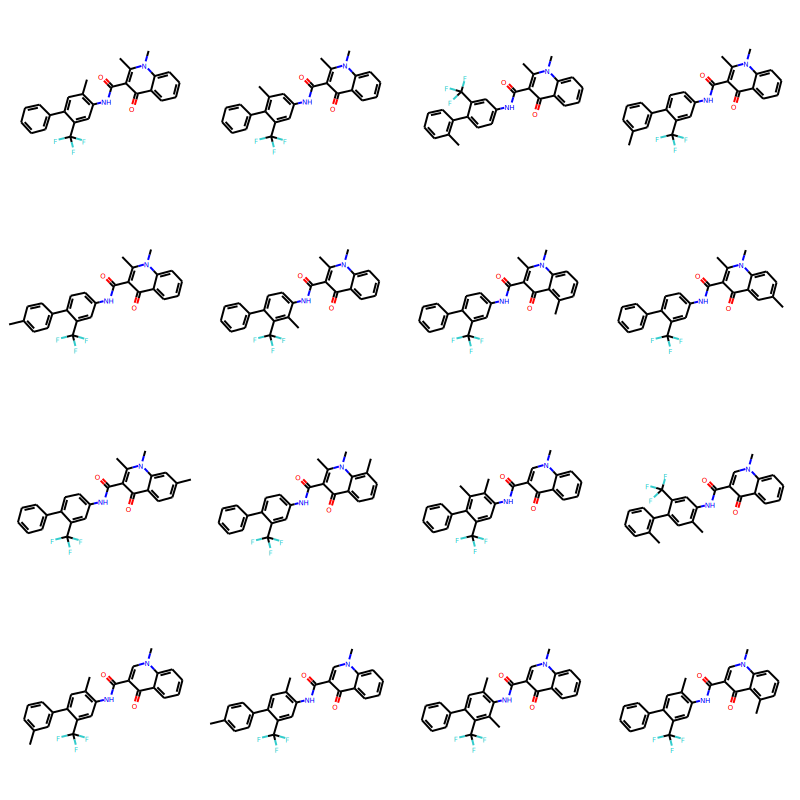

In [371]:
methyl_mol_list = attach_atom(mol, atomic_symbol="C", num_sub=2)
[AllChem.GenerateDepictionMatching2DStructure(x,tmplt_mol) for x in methyl_mol_list]
MolsToGridImage(methyl_mol_list[:16],useSVG=True,molsPerRow=4)